# **Breast Cancer Diagnosis Using k-Nearest Neighbors (kNN)**

This notebook implements an end-to-end **supervised learning** pipeline for breast cancer diagnosis using the classic **Breast Cancer Wisconsin** dataset from `scikit-learn`.

The project focuses on:
- Applying the **k-Nearest Neighbors (kNN)** algorithm, a **non-parametric**, **instance-based** (lazy) learning method.
- Following a structured ML workflow: data exploration, preprocessing, model training, and evaluation.
- Using evaluation metrics commonly discussed in machine learning theory:
  - Accuracy
  - Precision / Recall
  - F1-score (macro / micro)
  - Confusion Matrix
  - ROC Curve & AUC
- Performing **hyperparameter tuning for k** and connecting it to the idea of **model selection and cross-validation** from the theory.

This notebook is written with clear Markdown documentation, making it suitable as a portfolio / GitHub project to demonstrate understanding of classification, evaluation metrics, and kNN behavior.

## **1. Install Dependencies**

Install each dependency separately to keep the environment modular and explicit.
You may skip these cells if the libraries are already installed in your environment.

In [1]:
!pip install scikit-learn

In [2]:
!pip install pandas

In [3]:
!pip install numpy

In [4]:
!pip install matplotlib

## **2. Load the Breast Cancer Dataset**

We use the **Breast Cancer Wisconsin** diagnostic dataset, which is bundled with `scikit-learn`.

- Each sample corresponds to a digitized image of a **fine needle aspirate (FNA)** of a breast mass.
- Features describe characteristics of the cell nuclei present in the image (e.g., radius, texture, smoothness).
- The target label is **binary**:
  - `0`: malignant  
  - `1`: benign  

This dataset is widely used in teaching and benchmarking classification algorithms.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

data = load_breast_cancer()
X = data.data
y = data.target

feature_names = data.feature_names
target_names = data.target_names

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Classes:", target_names)

Shape of X: (569, 30)
Shape of y: (569,)
Classes: ['malignant' 'benign']


## **3. Exploratory Data Analysis (EDA)**

To better understand the dataset, we:
- Wrap the feature matrix into a `pandas.DataFrame` with human-readable column names.
- Inspect basic statistics (mean, standard deviation, min/max).
- Examine the distribution of the target classes to see if the dataset is balanced or imbalanced.

This high-level EDA helps us reason about:
- The scale and range of features (important for kNN distance calculations).
- Any potential bias in class distribution that may affect evaluation metrics (e.g., accuracy can be misleading on imbalanced data).

In [6]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
class_counts = df['target'].value_counts(normalize=True)
class_counts.index = [f"{name} ({i})" for i, name in enumerate(target_names)]
class_counts.name = "Proportion"
class_counts

malignant (0)    0.627417
benign (1)       0.372583
Name: Proportion, dtype: float64

## **4. Train/Test Split and Feature Scaling**

The kNN algorithm relies on a **distance metric** (typically Euclidean), which is sensitive to the scale of each feature.  
To align with best practices described in ML lectures:

1. We split the data into **training** and **test** sets.
   - Use a stratified split to preserve the class distribution in both sets.
2. We apply **Standardization (z-score scaling)** to each feature:
   - Subtract the mean
   - Divide by the standard deviation

This ensures that all features contribute comparably to the distance metric used by kNN.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_features = df.drop('target', axis=1).values
y_labels = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X_features,
    y_labels,
    test_size=0.2,
    random_state=42,
    stratify=y_labels
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (455, 30)
Test shape: (114, 30)


## **5. Train a Baseline kNN Classifier**

k-Nearest Neighbors is a **lazy learning** algorithm:
- There is no explicit parametric training phase.
- The model simply stores the training instances.
- At prediction time, it finds the **k closest training samples** and performs:
  - **Majority vote** (classification)
  - Or **average** (regression)

We start with a baseline value of **k = 5**, which is a common heuristic, and later we will tune k systematically.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]  # probability of the positive class (benign)

## **6. Evaluation Metrics: Accuracy, Precision, Recall, F1**

From the theory section of the slides, key metrics for classification include:

- **Accuracy**  
  Fraction of correctly classified samples. Can be misleading if classes are imbalanced.

- **Precision** (for the positive class)  
  Among all samples predicted as positive, how many are truly positive?  
  \( \text{Precision} = \frac{TP}{TP + FP} \)

- **Recall** (a.k.a. Sensitivity / True Positive Rate)  
  Among all truly positive samples, how many did we correctly identify?  
  \( \text{Recall} = \frac{TP}{TP + FN} \)

- **F1-score**  
  Harmonic mean of Precision and Recall, emphasizing cases where both must be high:  
  \( F1 = \frac{2PR}{P + R} \)

We report:
- Per-class metrics
- Macro-averaged metrics (treat each class equally)
- Micro-averaged metrics (weight by support / sample count)

In [11]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

accuracy = accuracy_score(y_test, y_pred)

precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=0)

print(f"Accuracy:        {accuracy:.4f}")
print(f"Precision (macro): {precision_macro:.4f}")
print(f"Recall    (macro): {recall_macro:.4f}")
print(f"F1-score  (macro): {f1_macro:.4f}")
print()
print(f"Precision (micro): {precision_micro:.4f}")
print(f"Recall    (micro): {recall_micro:.4f}")
print(f"F1-score  (micro): {f1_micro:.4f}")

print('\nClassification report:\n')
print(classification_report(
    y_test,
    y_pred,
    target_names=target_names,
    zero_division=0
))

Accuracy:        0.9561
Precision (macro): 0.9551
Recall    (macro): 0.9504
F1-score  (macro): 0.9526

Precision (micro): 0.9561
Recall    (micro): 0.9561
F1-score  (micro): 0.9561

Classification report:

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## **7. Confusion Matrix**

The **confusion matrix** provides a more detailed view of model behavior, decomposing predictions into:

- True Positives (TP)
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)

For binary medical diagnosis:
- **False Negatives** (failing to detect a malignant tumor) can be more critical than False Positives.
- Inspecting the confusion matrix helps relate the numeric metrics (Precision/Recall) back to real-world decisions.

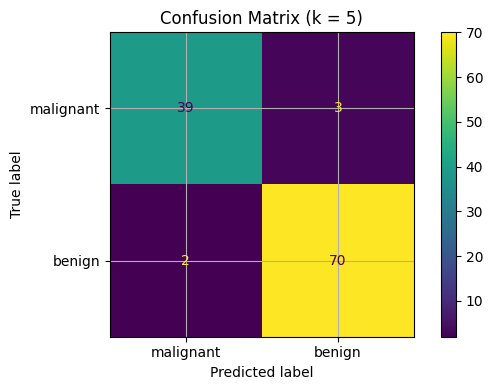

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title(f"Confusion Matrix (k = {k})")
plt.tight_layout()
plt.show()

## **8. ROC Curve and AUC**

The **Receiver Operating Characteristic (ROC)** curve plots:
- **True Positive Rate (TPR)** vs.
- **False Positive Rate (FPR)**

across different decision thresholds.

The **Area Under the Curve (AUC)** summarizes the model's ability to rank positive examples higher than negative ones:
- AUC ≈ 0.5 → random guessing.
- AUC → 1.0 → near-perfect separation.

This aligns directly with the ROC/AUC concepts from the lecture slides.

ROC-AUC: 0.9788


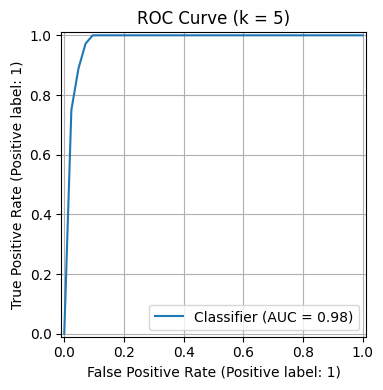

In [13]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {auc:.4f}")

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title(f"ROC Curve (k = {k})")
plt.tight_layout()
plt.show()

## **9. Model Selection: Varying k**

The choice of **k** controls the **bias-variance trade-off** in kNN:
- Small k (e.g., k = 1)  
  - Low bias, high variance  
  - Very flexible decision boundary, sensitive to noise.
- Large k  
  - Higher bias, lower variance  
  - Smoother decision boundary, may underfit.

We evaluate k in a range (e.g., 1 to 25) and observe how:
- Accuracy
- Macro F1-score
- ROC-AUC

change as functions of k. This empirical exploration illustrates the theoretical behavior discussed in the slides.

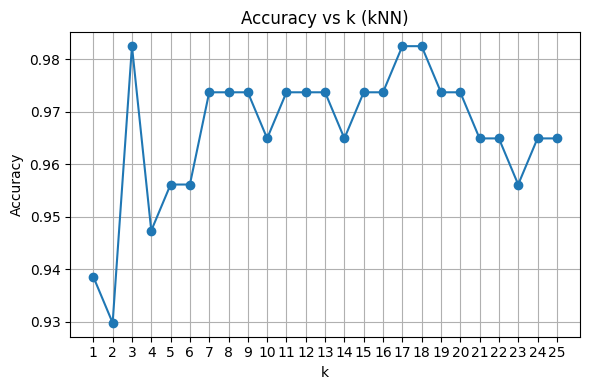

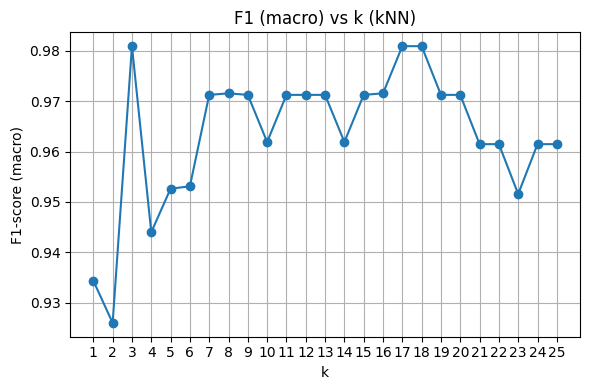

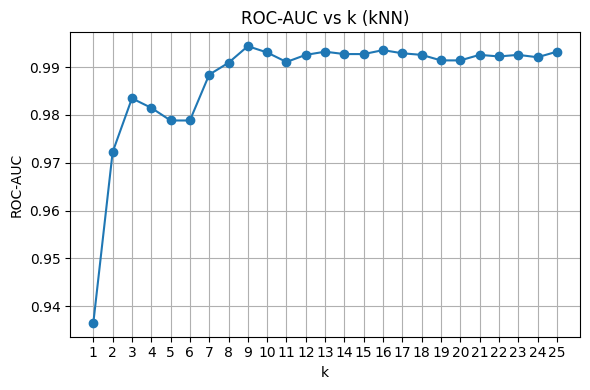

In [14]:
from sklearn.metrics import roc_auc_score

k_values = range(1, 26)
accuracies = []
f1_macros = []
aucs = []

for k_val in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k_val)
    knn_k.fit(X_train_scaled, y_train)
    y_pred_k = knn_k.predict(X_test_scaled)
    y_proba_k = knn_k.predict_proba(X_test_scaled)[:, 1]

    accuracies.append(accuracy_score(y_test, y_pred_k))
    f1_macros.append(f1_score(y_test, y_pred_k, average='macro', zero_division=0))
    aucs.append(roc_auc_score(y_test, y_proba_k))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (kNN)")
plt.xticks(list(k_values))
plt.tight_layout()
plt.show()

plt.plot(k_values, f1_macros, marker='o')
plt.xlabel("k")
plt.ylabel("F1-score (macro)")
plt.title("F1 (macro) vs k (kNN)")
plt.xticks(list(k_values))
plt.tight_layout()
plt.show()

plt.plot(k_values, aucs, marker='o')
plt.xlabel("k")
plt.ylabel("ROC-AUC")
plt.title("ROC-AUC vs k (kNN)")
plt.xticks(list(k_values))
plt.tight_layout()
plt.show()

## **10. Cross-Validation and Hyperparameter Tuning**

In the lecture material, **k-fold cross-validation** is introduced as a principled way to estimate generalization performance and to perform **model selection** (e.g., selecting k).

Here we:
- Build a `Pipeline` that combines:
  - `StandardScaler` for feature scaling
  - `KNeighborsClassifier` for classification
- Use `GridSearchCV` to search over multiple k values with **5-fold cross-validation**.
- Optimize for **macro F1-score**, which treats both classes equally, independent of their frequency.

This section closely reflects the theoretical workflow:
1. Define a hypothesis space (different values of k).
2. Use cross-validation to approximate the validation error.
3. Select the hyperparameter that minimizes error / maximizes a chosen metric.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': list(range(1, 26))
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_features, y_labels)

print("Best parameters:", grid_search.best_params_)
print("Best CV F1-macro:", grid_search.best_score_)

Best parameters: {'knn__n_neighbors': 8}
Best CV F1-macro: 0.9678386008077634


## **11. Summary**

In this notebook, we:

- Used the **Breast Cancer Wisconsin** dataset to build a medically relevant binary classifier.
- Applied the **k-Nearest Neighbors** algorithm, aligning with the non-parametric, instance-based learning paradigm from the slides.
- Performed:
  - Train/test splitting and **feature scaling** (critical for distance-based methods).
  - Comprehensive evaluation using **Accuracy, Precision, Recall, F1, Confusion Matrix, ROC-AUC**.
  - Empirical exploration of different k values to visualize the **bias-variance trade-off**.
  - **Cross-validated hyperparameter tuning** via `GridSearchCV` and `Pipeline`.

This project can be included in a portfolio or GitHub repository as evidence of:
- Solid understanding of classification metrics and model evaluation.
- Ability to implement kNN and interpret its behavior.
- Familiarity with cross-validation and hyperparameter optimization in `scikit-learn`.